In [108]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
from sklearn.pipeline import make_pipeline

In [88]:
np.random.seed(43)
x = np.linspace(0, 20, 15)
y = 5 * x + np.random.normal(0.0, 20.0, 15)
X = x.reshape(15, 1)

In [110]:
pipe = make_pipeline(
        PolynomialFeatures(degree=20),
        MinMaxScaler(),
        Ridge(alpha = 0.1)
)

In [111]:
pipe.fit(X,y)
pipe.score(X,y)
pipe.named_steps

{'polynomialfeatures': PolynomialFeatures(degree=20, include_bias=True, interaction_only=False),
 'minmaxscaler': MinMaxScaler(copy=True, feature_range=(0, 1)),
 'ridge': Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
    normalize=False, random_state=None, solver='auto', tol=0.001)}

In [ ]:
#For hyperparam optimization
params = {
    'polynomialfeatures__degree': [1,5,10],
    'ridge__alpha': []
}

In [89]:
X.shape, y.shape

((15, 1), (15,))

In [90]:
p = PolynomialFeatures(degree = 20)
Xt = p.fit_transform(X)


In [91]:
sc = MinMaxScaler()
Xt = sc.fit_transform(Xt)

In [104]:
#m = LinearRegression()
m=Lasso(alpha = .1)
m.fit(Xt,y)
m.score(Xt,y)

0.8377941767530784

<BarContainer object of 21 artists>

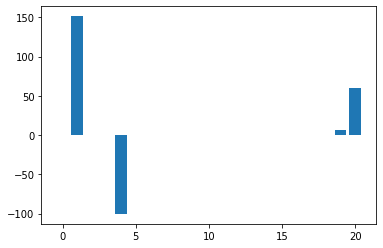

In [105]:
plt.bar(range(21), m.coef_)

In [106]:
ypred = m.predict(Xt)

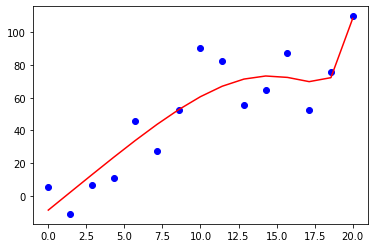

In [107]:
plt.plot(X,y, 'bo')
plt.plot(X, ypred, 'r-')

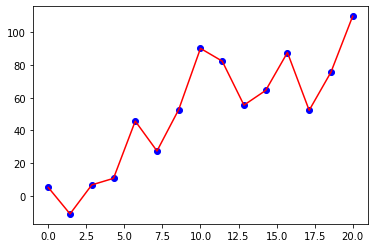

In [50]:
#Different random seed
plt.plot(X,y, 'bo')
plt.plot(X, ypred, 'r-')